In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from io import StringIO
dataset=StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)
df


,Plays Fetch,Is grumpy,Favorite food,Species
0,Yes,No,Bacon,Dog
1,No,Yes,Dog Food,Dog
2,No,Yes,Cat food,Cat
3,No,Yes,Bacon,Cat
4,No,No,Cat food,Cat
5,No,Yes,Bacon,Cat
6,No,Yes,Cat food,Cat
7,No,No,Dog Food,Dog
8,No,Yes,Cat food,Cat
9,Yes,No,Dog Food,Dog


In [3]:
df['B plays Fetch'] = np.where(df['Plays Fetch']== 'Yes',True,False)
df['B Is grumpy'] = np.where(df['Is grumpy']== 'Yes',True,False)

df["B Favorite food"] = [(0 if(food=='Bacon')
                          else 1 if (food=='Dog Food')
                          else 2)
                         for food in df['Favorite food']]
df

,Plays Fetch,Is grumpy,Favorite food,Species,B plays Fetch,B Is grumpy,B Favorite food
0,Yes,No,Bacon,Dog,True,False,0
1,No,Yes,Dog Food,Dog,False,True,1
2,No,Yes,Cat food,Cat,False,True,2
3,No,Yes,Bacon,Cat,False,True,0
4,No,No,Cat food,Cat,False,False,2
5,No,Yes,Bacon,Cat,False,True,0
6,No,Yes,Cat food,Cat,False,True,2
7,No,No,Dog Food,Dog,False,False,1
8,No,Yes,Cat food,Cat,False,True,2
9,Yes,No,Dog Food,Dog,True,False,1


In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

model = decisiontree.fit(df[['B plays Fetch','B Is grumpy','B Favorite food']],df['Species']) #2dimen-3col,1dim

In [6]:
print("Extracted Classes", model.classes_)

Extracted Classes ['Cat' 'Dog']


In [7]:
print("Maximum Features", model.max_features_)

Maximum Features 3


In [8]:
model.tree_

In [9]:
model.predict([[False,False,0]])

array(['Dog'], dtype=object)

In [10]:
model.predict([[False,False,0],
              [True,True,1],
              [False,True,2]])

array(['Dog', 'Dog', 'Cat'], dtype=object)

In [11]:
print(df['Species'].tolist())  #actual

Predicted_Species = model.predict(df[["B plays Fetch","B Is grumpy","B Favorite food"]])
print(Predicted_Species.tolist())   #predicted output

['Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog']
['Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog']


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
confusion_matrix(df['Species'],Predicted_Species)

array([[8, 0],
       [0, 6]], dtype=int64)

<AxesSubplot:>

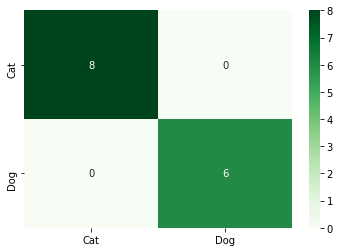

In [14]:
import seaborn as sb
sb.heatmap(confusion_matrix(df['Species'],Predicted_Species),annot=True,cmap='Greens',xticklabels=model.classes_,yticklabels=model.classes_)

In [15]:
print(classification_report(df['Species'],Predicted_Species))

              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00         8
         Dog       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



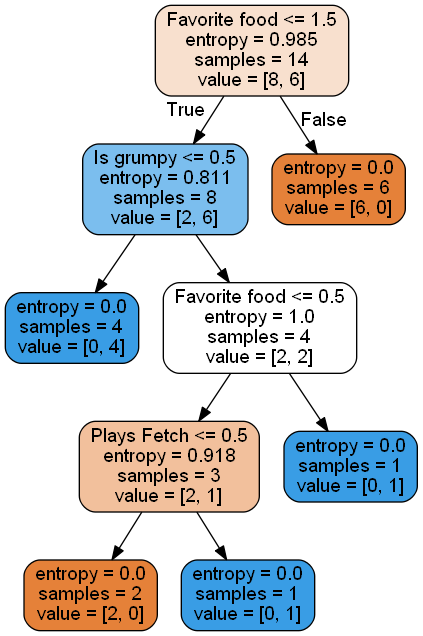

In [18]:
# only for windows
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg = StringIO()

export_graphviz(model,out_file  = DecisionTreeImg,
               filled=True,rounded = True, 
                feature_names = ['Plays Fetch','Is grumpy','Favorite food'])

graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())